In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
industry_papers = pd.read_parquet('./data/industry_really_complete.parquet')
academic_papers = pd.read_parquet('./data/academic_really_complete.parquet')

In [4]:
industry_papers

,id,title,abstract_claims,conclusion_claims,main_author,institution,year,institution_type,text,abstract,conclusion
0,2011.00890,Emergent Communication Pretraining for Few-Sho...,"[Nevertheless, most of the world's languages l...","[In theory, it makes this paradigm applicable ...",Yaoyiran Li,Language Science (South Korea),2020.0,Industry,None,While state-of-the-art models that rely upon m...,and Future Work We have demonstrated that an e...
1,2209.15236,Language-Family Adapters for Multilingual Neur...,"[In machine translation, multilingual pretrain...",[We have presented a novel approach for fine-t...,Alexandra Chronopoulou,Microsoft (Germany),2023.0,Industry,None,Massively multilingual models pretrained on ab...,We have presented a novel approach for fine-tu...
2,1910.13299,Findings of the Third Workshop on Neural Gener...,[This document describes the findings of the T...,[This paper summarized the results of the Thir...,Hiroaki Hayashi,Google (United States),2019.0,Industry,None,This document describes the findings of the Th...,This paper summarized the results of the Third...
3,2104.08677,From Fully Trained to Fully Random Embeddings:...,[We also show how incorporating only a limited...,[Our work points towards the need of rethinkin...,Krtin Kumar,Thomson Reuters (Canada),2022.0,Industry,None,Embedding matrices are key components in neura...,Our work points towards the need of rethinking...
4,1703.04908,Emergence of Grounded Compositional Language i...,[By capturing statistical patterns in large co...,[This abstract language is formed without any ...,Igor Mordatch,OpenAI (United States),2018.0,Industry,None,By capturing statistical patterns in large cor...,We have presented a multi-agent environment an...
5,1610.08613,Can Active Memory Replace Attention?,[Several mechanisms to focus attention of a ne...,[To better understand the main shortcoming of ...,Łukasz Kaiser,Google (United States),2016.0,Industry,None,Several mechanisms to focus attention of a neu...,To better understand the main shortcoming of p...
6,1411.4555,Show and Tell: A Neural Image Caption Generator,[The model is trained to maximize the likeliho...,[The model is trained to maximize the likeliho...,Oriol Vinyals,Google (United States),2015.0,Industry,None,Automatically describing the content of an ima...,"We have presented NIC, an end-to-end neural ne..."
7,2205.01398,Neural language models for network configurati...,"[Boosted by deep learning, natural language pr...","[and recommendations In this paper, we overvie...",Zied Ben Houidi,Huawei Technologies (France),2022.0,Industry,None,"Boosted by deep learning, natural language pro...","and recommendations In this paper, we overview..."
8,1909.05362,Problems with automating translation of movie/...,[We present 27 problems encountered in automat...,"[In this work, we explained 27 problems in aut...",Prabhakar Gupta,Amazon (Germany),2019.0,Industry,None,We present 27 problems encountered in automati...,"In this work, we explained 27 problems in auto..."
9,2201.04843,Multi-task Pre-training Language Model for Sem...,"[Semantic networks, such as the knowledge grap...",[and Future Work We present a multi-task pre-t...,Da Li,Tencent (China),2023.0,Industry,None,"Semantic networks, such as the knowledge graph...",and Future Work We present a multi-task pre-tr...


In [ ]:
from transformers import AutoModel, AutoTokenizer

tokenizer_industry = AutoTokenizer.from_pretrained("bert-base-uncased")
model_industry = AutoModel.from_pretrained("bert-base-uncased")



In [3]:
industry_claims = [
    claim for claims in industry_papers["abstract_claims"] for claim in claims
]
academic_claims = [
    claim for claims in academic_papers["abstract_claims"] for claim in claims
]

# Create labels (0 for industry, 1 for academic)
labels = [0] * len(industry_claims) + [1] * len(academic_claims)

# Combine all claims
all_claims = industry_claims + academic_claims

# Generate embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(all_claims, show_progress_bar=True)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create DataFrame with all information
plot_data = pd.DataFrame(
    {
        "x": tsne_results[:, 0],
        "y": tsne_results[:, 1],
        "type": ["Industry" if l == 0 else "Academic" for l in labels],
        "claim": all_claims,
        "article_id": (
            [
                i
                for row in industry_papers.iterrows()
                for i in [row[1]["id"]] * len(row[1]["abstract_claims"])
            ]
            + [
                i
                for row in academic_papers.iterrows()
                for i in [row[1]["id"]] * len(row[1]["abstract_claims"])
            ]
        ),
    }
)

# Create interactive plot
fig = px.scatter(
    plot_data,
    x="x",
    y="y",
    color="type",
    hover_data=["article_id", "claim"],
    title="t-SNE visualization of conclusion claims",
    color_discrete_map={"Industry": "#FF6B6B", "Academic": "#4ECDC4"},
)

# Update layout
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(hoverlabel=dict(bgcolor="white"), width=1000, height=600)

# Show plot
fig.show()

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [4]:
# Get conclusion claims
industry_claims = [
    claim for claims in industry_papers["conclusion_claims"] for claim in claims
]
academic_claims = [
    claim for claims in academic_papers["conclusion_claims"] for claim in claims
]

# Create labels (0 for industry, 1 for academic)
labels = [0] * len(industry_claims) + [1] * len(academic_claims)

# Combine all claims
all_claims = industry_claims + academic_claims

# Generate embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(all_claims, show_progress_bar=True)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create DataFrame with all information
plot_data = pd.DataFrame(
    {
        "x": tsne_results[:, 0],
        "y": tsne_results[:, 1],
        "type": ["Industry" if l == 0 else "Academic" for l in labels],
        "claim": all_claims,
        "article_id": (
            [
                i
                for row in industry_papers.iterrows()
                for i in [row[1]["id"]] * len(row[1]["conclusion_claims"])
            ]
            + [
                i
                for row in academic_papers.iterrows()
                for i in [row[1]["id"]] * len(row[1]["conclusion_claims"])
            ]
        ),
    }
)

# Create interactive plot
fig = px.scatter(
    plot_data,
    x="x",
    y="y",
    color="type",
    hover_data=["article_id", "claim"],
    title="t-SNE visualization of conclusion claims",
    color_discrete_map={"Industry": "#FF6B6B", "Academic": "#4ECDC4"},
)

# Update layout
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(hoverlabel=dict(bgcolor="white"), width=1000, height=600)

# Show plot
fig.show()

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

In [58]:
def extract_numbered_sections(text_array):
    # Initialize result dictionary
    result = {}

    # Extract title (first array)
    result["title"] = text_array[0][0]

    # Extract abstract (second array)
    result["abstract"] = " ".join(text_array[1]) if len(text_array) > 1 else ""

    # Process remaining sections
    for i, section in enumerate(text_array[2:], 1):
        if len(section) > 0:
            section_name = section[0].strip()
            section_content = " ".join(section[1:]) if len(section) > 1 else ""
            result[f"section_{i}"] = (section_name, section_content)

    return result


# Find max number of sections
max_sections_industry = max(
    len(text) - 2 for text in industry_papers["text"]
)  # -2 for title and abstract

# Create DataFrame with numbered sections
sections_df_industry = pd.DataFrame(
    [extract_numbered_sections(text) for text in industry_papers["text"]]
)

# Fill NaN values
sections_df_industry = sections_df_industry.fillna("")

# Find max number of sections
max_sections_academic = max(
    len(text) - 2 for text in academic_papers["text"]
)  # -2 for title and abstract

# Create DataFrame with numbered sections
sections_df_academic = pd.DataFrame(
    [extract_numbered_sections(text) for text in academic_papers["text"]]
)

# Fill NaN values
sections_df_academic = sections_df_academic.fillna("")

Industry papers statistics:
Mean: 17.28
Median: 18.00
Std: 8.76

Academic papers statistics:
Mean: 19.56
Median: 18.00
Std: 9.30


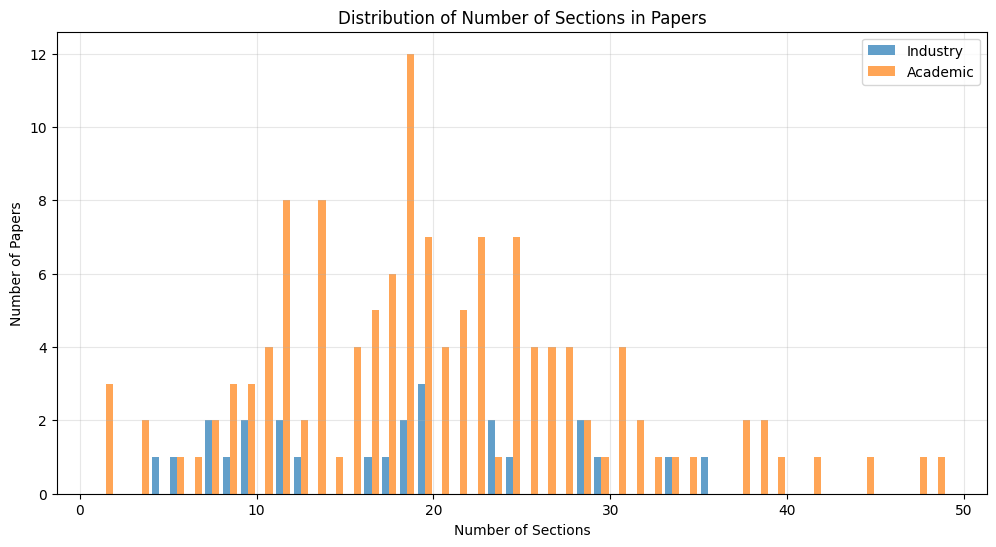

In [64]:
# Count sections for each paper (excluding title and abstract)
industry_sections = [len(text) - 2 for text in industry_papers["text"]]
academic_sections = [len(text) - 2 for text in academic_papers["text"]]

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(
    [industry_sections, academic_sections],
    label=["Industry", "Academic"],
    bins=range(
        min(min(industry_sections), min(academic_sections)),
        max(max(industry_sections), max(academic_sections)) + 2,
        1,
    ),
    alpha=0.7,
)

plt.title("Distribution of Number of Sections in Papers")
plt.xlabel("Number of Sections")
plt.ylabel("Number of Papers")
plt.legend()
plt.grid(True, alpha=0.3)

# Print statistics
print(f"Industry papers statistics:")
print(f"Mean: {np.mean(industry_sections):.2f}")
print(f"Median: {np.median(industry_sections):.2f}")
print(f"Std: {np.std(industry_sections):.2f}")
print(f"\nAcademic papers statistics:")
print(f"Mean: {np.mean(academic_sections):.2f}")
print(f"Median: {np.median(academic_sections):.2f}")
print(f"Std: {np.std(academic_sections):.2f}")

plt.show()

In [65]:
# Extract section names
industry_section_names = [
    section[0]
    for text in industry_papers["text"][2:]
    for section in text
    if len(section) > 0
]
academic_section_names = [
    section[0]
    for text in academic_papers["text"][2:]
    for section in text
    if len(section) > 0
]

# Create labels
labels = ["Industry"] * len(industry_section_names) + ["Academic"] * len(
    academic_section_names
)
all_sections = industry_section_names + academic_section_names

# Generate embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(all_sections, show_progress_bar=True)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create DataFrame for plotting
plot_data = pd.DataFrame(
    {
        "x": tsne_results[:, 0],
        "y": tsne_results[:, 1],
        "type": labels,
        "section_name": all_sections,
    }
)

# Create interactive plot
fig = px.scatter(
    plot_data,
    x="x",
    y="y",
    color="type",
    hover_data=["section_name"],
    title="t-SNE visualization of section names",
    color_discrete_map={"Industry": "#FF6B6B", "Academic": "#4ECDC4"},
)

# Update layout
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(hoverlabel=dict(bgcolor="white"), width=1000, height=600)

fig.show()

Batches: 100%|██████████| 99/99 [00:18<00:00,  5.37it/s]
/Users/omar/Library/Caches/pypoetry/virtualenvs/streem-wind-prod-forecast-jFLq_jOy-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/omar/Library/Caches/pypoetry/virtualenvs/streem-wind-prod-forecast-jFLq_jOy-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [66]:
# Get section names for each paper
def get_paper_sections(text):
    # Skip title and abstract (first 2 elements)
    return [section[0] for section in text[2:] if len(section) > 0]


industry_papers_sections = [
    get_paper_sections(text) for text in industry_papers["text"]
]
academic_papers_sections = [
    get_paper_sections(text) for text in academic_papers["text"]
]

# Convert lists of sections to string representation
industry_sections_text = [" | ".join(sections) for sections in industry_papers_sections]
academic_sections_text = [" | ".join(sections) for sections in academic_papers_sections]

# Combine all papers
all_papers_sections = industry_sections_text + academic_sections_text
labels = ["Industry"] * len(industry_sections_text) + ["Academic"] * len(
    academic_sections_text
)

# Generate embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(all_papers_sections, show_progress_bar=True)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create DataFrame for plotting
plot_data = pd.DataFrame(
    {
        "x": tsne_results[:, 0],
        "y": tsne_results[:, 1],
        "type": labels,
        "sections": all_papers_sections,
    }
)

# Create interactive plot
fig = px.scatter(
    plot_data,
    x="x",
    y="y",
    color="type",
    hover_data=["sections"],
    title="t-SNE visualization of papers based on section structure",
    color_discrete_map={"Industry": "#FF6B6B", "Academic": "#4ECDC4"},
)

# Update layout
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(hoverlabel=dict(bgcolor="white"), width=1000, height=600)

fig.show()

Batches: 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]
/Users/omar/Library/Caches/pypoetry/virtualenvs/streem-wind-prod-forecast-jFLq_jOy-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/omar/Library/Caches/pypoetry/virtualenvs/streem-wind-prod-forecast-jFLq_jOy-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[nltk_data] Downloading package punkt to /Users/omar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/omar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most similar words to 'learning':
[('model', 0.9876201748847961), ('translation', 0.9850051999092102), ('language', 0.9834638237953186), ('tasks', 0.9829775094985962), ('models', 0.9828003644943237), ('proposed', 0.981328547000885), ('using', 0.9809401035308838), ('neural', 0.9809185862541199), ('languages', 0.9805827736854553), ('results', 0.9804854989051819)]

Similarity between 'quantum' and 'computing':
0.30829513


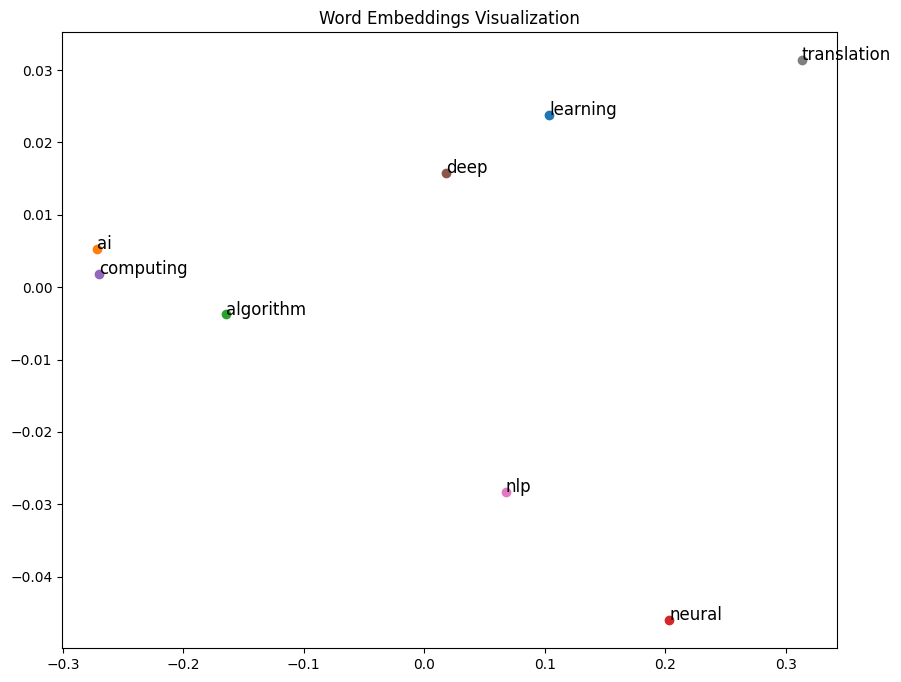

Cosine similarity between academic and industry embeddings: 1.0000


In [28]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Download NLTK stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        # Tokenize and lowercase
        tokens = word_tokenize(text.lower())
        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess the abstracts
academic_tokens = preprocess(academic_abstracts)
industry_tokens = preprocess(industry_abstracts)

# Combine tokens for training Word2Vec
all_tokens = academic_tokens + industry_tokens

# Train Word2Vec model
word2vec_model = Word2Vec(all_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Save the model (optional)
word2vec_model.save("word2vec.model")

# Load the model (if saved)
# word2vec_model = Word2Vec.load("word2vec.model")

# Explore the model
print("Most similar words to 'learning':")
print(word2vec_model.wv.most_similar("learning"))

print("\nSimilarity between 'quantum' and 'computing':")
print(word2vec_model.wv.similarity("quantum", "computing"))

# Visualize word embeddings in 2D using PCA
def plot_embeddings(model, words):
    # Get embeddings for the words
    word_vectors = np.array([model.wv[word] for word in words])

    # Reduce dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)
    plt.title("Word Embeddings Visualization")
    plt.show()

# Words to visualize
words_to_plot = ["learning", "ai", "algorithm", "neural", "computing", "deep", "nlp", "translation"]
plot_embeddings(word2vec_model, words_to_plot)

# Compare academic vs. industry embeddings
def compare_domains(model, academic_tokens, industry_tokens):
    # Get average embeddings for academic and industry abstracts
    academic_embeddings = np.array([model.wv[word] for tokens in academic_tokens for word in tokens])
    industry_embeddings = np.array([model.wv[word] for tokens in industry_tokens for word in tokens])

    # Compute average embedding for each domain
    academic_avg = np.mean(academic_embeddings, axis=0)
    industry_avg = np.mean(industry_embeddings, axis=0)

    # Compute cosine similarity between the two domains
    from sklearn.metrics.pairwise import cosine_similarity
    similarity = cosine_similarity([academic_avg], [industry_avg])[0][0]
    print(f"Cosine similarity between academic and industry embeddings: {similarity:.4f}")

# Compare academic and industry embeddings
compare_domains(word2vec_model, academic_tokens, industry_tokens)